In [14]:
import os
import numpy as np
    
#Modify image path
def processed_image_path(source_path, folder):
    destination_directory = '/home/local/ASURITE/tchen169/Documents/Github-CV4TSC/CV4TSC/Train_RL_Model/Dataset/'

    # Extract the filename
    filename = os.path.basename(source_path)

    # Construct the new path
    new_path = os.path.join(destination_directory, folder, filename)

    print("New path:", new_path)
    return new_path

def point_in_search_region(cx, cy, ax, ay, bx, by):
			# Compute the vectors C->B and A->B
			vector_CB = (bx - cx, by - cy)
			vector_AB = (bx - ax, by - ay)

			# Compute the dot product of vectors C->B and A->B
			dot_product = vector_CB[0] * vector_AB[0] + vector_CB[1] * vector_AB[1]
			if dot_product>0:
				return True
			return False

"""Calculate the distance from a point P(px, py) to a line defined by points A(ax, ay) and B(bx, by)."""
def distance_to_line(px, py, ax, ay, bx, by):
    num = abs((bx - ax) * (ay - py) - (ax - px) * (by - ay))
    den = np.sqrt((bx - ax) ** 2 + (by - ay) ** 2)
    return num / den


"""Determine if a point P(px, py) is left or right of a line AB. Returns 'left', 'right', or 'on'."""
def point_relative_to_line(px, py, ax, ay, bx, by):
    position = (bx - ax) * (py - ay) - (by - ay) * (px - ax)
    if position > 0:
        return 'left'
    elif position < 0:
        return 'right'
    else:
        return 'on'

# Calculate for entire Dataset using different models

In [15]:
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_detections_in_image(image_path, model, device, lane_2d_data, folder, distance_threshold=100):
    """
    Process an image to detect cars, filter based on distance from lane, and return the filtered detections.
    
    Parameters:
    - image_path: Path to the image.
    - model: Pre-trained detection model.
    - device: Device on which the model is loaded (e.g., 'cuda' or 'cpu').
    - lane_2d_data: Data containing lane information.
    - folder: Key to access specific lane information in lane_2d_data.
    - distance_threshold: Distance threshold for filtering detections based on their distance to the lane.
    
    Returns:
    - List of filtered detections.
    """
    
    # Load and transform the image
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([transforms.ToTensor()])
    image_tensor = transform(image).to(device)
    
    # Get predictions from the model
    with torch.no_grad():
        prediction = model([image_tensor])

    vehicle_labels = [2, 3, 4, 6, 8]  
    # Convert vehicle_labels list to a tensor and move it to the same device as the model's predictions
    vehicle_labels_tensor = torch.tensor(vehicle_labels).to(prediction[0]['labels'].device)
    
    left_count = 0
    right_count = 0
    if len(prediction) > 0:
        car_indices = torch.isin(prediction[0]['labels'], vehicle_labels_tensor) & (prediction[0]['scores'] > 0.5)
        car_boxes = prediction[0]['boxes'][car_indices].cpu().numpy()
        car_scores = prediction[0]['scores'][car_indices].cpu().numpy()
        car_labels = prediction[0]['labels'][car_indices].cpu().numpy()

        lane_start, lane_end = tuple(lane_2d_data[folder]["lane_point_1"]), tuple(lane_2d_data[folder]["lane_point_2"])

        # Plot the image
        fig, ax = plt.subplots(1)
        ax.imshow(image)

        # Draw lane vectors
        lane_vector = np.array(lane_end) - np.array(lane_start)
        ax.arrow(lane_start[0], lane_start[1], lane_vector[0], lane_vector[1], head_width=20, head_length=20, fc='r', ec='r')

        # Process each detection
        for box, score, label in zip(car_boxes, car_scores, car_labels):
            x1, y1, x2, y2 = box
            cx, cy = (x1 + x2) // 2, (y1 + y2) // 2

            # Assuming distance_to_line and point_relative_to_line are defined elsewhere
            dist = distance_to_line(cx, cy, *lane_start, *lane_end)
            position = point_relative_to_line(cx, cy, *lane_start, *lane_end)
            inSearchRegion = point_in_search_region(cx, cy, *lane_start, *lane_end)

            if dist < distance_threshold and inSearchRegion:
                if position == "right":
                    right_count += 1
                elif position == "left":
                    left_count += 1
                
                # Draw bounding box
                rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rect)

        plt.show()

    return [left_count, right_count]


## Sunny

CUDA is available. Model will be moved to GPU.


/home/local/ASURITE/tchen169/anaconda3/envs/carla-prithvi/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/local/ASURITE/tchen169/anaconda3/envs/carla-prithvi/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/local/ASURITE/tchen169/anaconda3/envs/carla-prithvi/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The curre

70 A
New path: /home/local/ASURITE/tchen169/Documents/Github-CV4TSC/CV4TSC/Train_RL_Model/Dataset/A/70.jpg


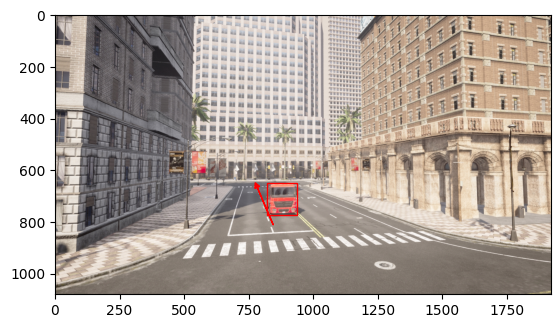

Predicted [1, 0] GT [1, 0]
70 B
New path: /home/local/ASURITE/tchen169/Documents/Github-CV4TSC/CV4TSC/Train_RL_Model/Dataset/B/70.jpg


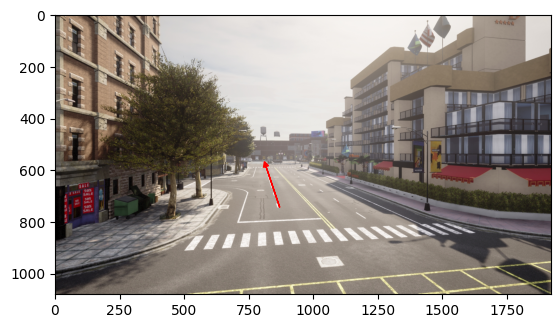

Predicted [0, 0] GT [0, 0]
70 C
New path: /home/local/ASURITE/tchen169/Documents/Github-CV4TSC/CV4TSC/Train_RL_Model/Dataset/C/70.jpg


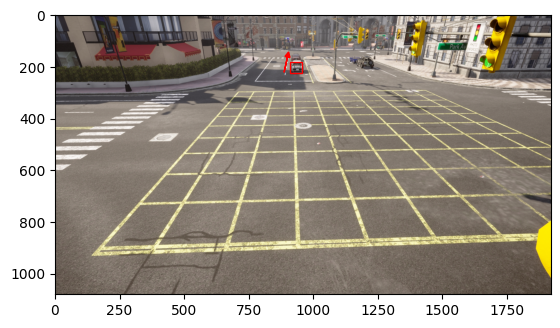

Predicted [1, 0] GT [2, 0]
70 D
New path: /home/local/ASURITE/tchen169/Documents/Github-CV4TSC/CV4TSC/Train_RL_Model/Dataset/D/70.jpg


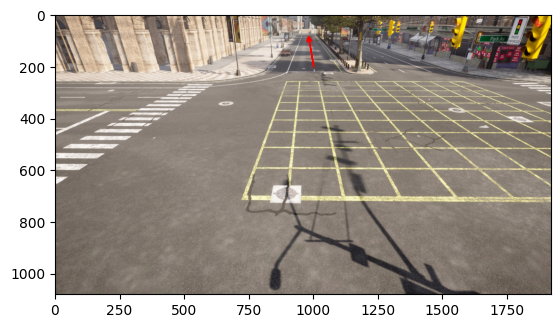

Predicted [0, 0] GT [0, 0]
Model Name: RetinaNet
Inference Time: 0.9050166606903076
rmse results: 0.3535533905932738
mse results: 0.125
mae results: 0.125


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt
import time
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn, maskrcnn_resnet50_fpn, retinanet_resnet50_fpn, ssdlite320_mobilenet_v3_large
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import json
# from transform import *

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available. Model will be moved to GPU.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Model will run on CPU.")

# Models to evaluate
models = {
    "Faster R-CNN": fasterrcnn_resnet50_fpn(pretrained=True),
    "Mask R-CNN": maskrcnn_resnet50_fpn(pretrained=True),
    "RetinaNet": retinanet_resnet50_fpn(pretrained=True),
}

y_pred = []
y_true = []

# Load lane cordinates
lane_file_path = "/home/local/ASURITE/tchen169/Documents/CV4TSC/Test/Lane_file_path.json"
with open(lane_file_path, 'r') as file:
	lane_2d_data = json.load(file)
	
# Load your image
json_file_path = "/home/local/ASURITE/tchen169/Documents/Github-CV4TSC/CV4TSC/Train_RL_Model/Dataset/Intersection_camera.json"

# Evaluation loop
for model_name, model in models.items():
	if model_name == "RetinaNet":
		model.eval()
		model.to(device)
		with open(json_file_path, 'r') as file:
			camera_json = json.load(file)
			start_time = time.time()
			for n in range(len(camera_json)):
				if(n==70):
					camera_data = camera_json[str(n)]
					for i in range(4):
						folder= chr(ord('A') + i)
						print(f"{n} {folder}")
						image_path = camera_data[folder]["image"]
						image_path = processed_image_path(image_path, folder)
						label = [camera_data[folder]["Lane1"]["total_vehicles"], camera_data[folder]["Lane2"]["total_vehicles"]]
						predicted_output = display_detections_in_image(image_path, model, device, lane_2d_data, folder, distance_threshold=100)
						print(f"Predicted {predicted_output} GT {label}")
						y_true.extend(label)
						y_pred.extend(predicted_output)

		end_time = time.time()
		print("Model Name:", model_name)
		print("Inference Time:",end_time-start_time)
		print("rmse results:",sqrt(mean_squared_error(y_true,y_pred)))
		print("mse results:",mean_squared_error(y_true,y_pred))
		print("mae results:",mean_absolute_error(y_true,y_pred))